## Линейная модель

Линейная модель - это математическая модель, используемая в машинном обучении для предсказания значений на основе линейной комбинации входных признаков. Она предполагает, что выходное значение (прогноз) можно выразить как взвешенную сумму входных признаков с добавлением смещения (bias). Математически это можно записать следующим образом:


$\hat{y} = w_1x_1 + w_2x_2 + \ldots + w_nx_n + b$

где:
- $\hat{y}$ - прогнозируемое значение,
- $w_1, w_2, \ldots, w_n$ - веса (параметры) модели для каждого признака,
- $x_1, x_2, \ldots, x_n$ - входные признаки,
- $b$ - смещение (bias).

### Вычисление выхода линейной модели

Для вычисления выхода линейной модели, просто подставьте значения признаков в уравнение, используя соответствующие веса и смещение. Матричная формула для вычисления выхода линейной модели для набора данных \(X\) выглядит следующим образом:

$\hat{Y} = X \cdot \mathbf{w} + b$

где:
- $\hat{Y}$ - вектор прогнозов для всего набора данных,
- $X$ - матрица признаков, где каждая строка представляет один образец, а столбцы - признаки,
- $\mathbf{w}$ - вектор весов модели,
- $b$ - смещение (bias).

### Обучение линейной модели

Обучение линейной модели заключается в настройке параметров (весов и смещения) так, чтобы они наилучшим образом соответствовали обучающим данным. Одним из наиболее распространенных методов обучения линейной модели является градиентный спуск.

### Градиентный спуск

Градиентный спуск - это метод оптимизации, используемый для обновления параметров модели с целью минимизации функции потерь. Функция потерь оценивает, насколько хорошо модель предсказывает реальные значения на обучающих данных.

Для линейной регрессии, часто используется среднеквадратичная ошибка (Mean Squared Error - MSE) в качестве функции потерь:

$MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2$

где:
- $N$ - количество обучающих примеров,
- $y_i$ - реальное значение для i-го примера,
- $\hat{y}_i$ - прогнозированное значение для i-го примера.

### Корректировка весов модели

Для обновления весов модели в методе градиентного спуска, используется градиент функции потерь по отношению к параметрам модели. Градиент показывает направление наибольшего увеличения функции потерь, поэтому мы двигаемся в противоположном направлении градиента, чтобы уменьшить потери. Формула для обновления весов выглядит следующим образом:

$\mathbf{w}_{\text{новые}} = \mathbf{w}_{\text{старые}} - \text{learning_rate} \cdot \nabla L$

где:
- $\mathbf{w}_{\text{новые}}$ - новые веса после обновления,
- $\mathbf{w}_{\text{старые}}$ - текущие веса,
- $\text{learning_rate}$ - скорость обучения (коэффициент, контролирующий размер шага градиентного спуска),
- $\nabla L$ - градиент функции потерь по параметрам модели.

Этот процесс повторяется до достижения сходимости или определенного числа итераций.

## Классификатор на линейной модели

На линейной модели можно построить и классификатор. Для этого нужно выход линейной модели отбразить в интервал от 0 до 1. В этом нам поможет логистическая функция:

$\sigma(z) = \frac{1}{1 + e^{-z}}$

Для обучения скорректируем функцию потерь. Нетрудно показать, что функция, называемая кросс-энтропией на самом деле соответствует максимизации правдоподобия (кстати, почитайте про правдоподобие), ниже представлено выражение для нее

$BCE = -\frac{1}{N} \sum_{i=1}^{N} \left(y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)\right)$

где:
- $N$ - количество обучающих примеров,
- $y_i$ - истинная метка класса (0 или 1) для i-го примера,
- $\hat{y}_i$ - вероятность принадлежности к классу 1 для i-го примера (выход сигмоидной функции).

Будем считать, что модель относит объект к 1 классу, если ее выход $>=0.5$, иначе - 0 класс.

## Как считать градиенты

Приведу градиент для кросс-энтропии:

$\nabla_{\mathbf{w}} \text{BCE} = -\frac{1}{N} \mathbf{X}^T (\mathbf{y} - \hat{\mathbf{y}})$

Для MSE вычислить градиент самостоятельно

In [171]:
import numpy as np
import matplotlib.pyplot as plt


class LinearModel:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros(num_features)
        self.bias = 0

    def __call__(self, X):
        return np.dot(X,self.weights) + self.bias


class LinearRegressor(LinearModel):
    def fit(self, X, y, learning_rate=0.01, epochs=100):
        error_history = []
        for _ in range(epochs):
            predictions = self.predict(X)
            error = y - predictions
            gradient = -2 * np.dot(X.T, error) / len(X)
            self.weights -= learning_rate * gradient
            self.bias -= learning_rate * np.mean(error)
            current_error = ((y - predictions) ** 2).sum()/len(X)
            error_history.append(current_error)
        return error_history

    def predict(self, X):
        return np.dot(X,self.weights) + self.bias


class LinearClassifier(LinearModel):
    def fit(self, X, y, learning_rate=0.01, epochs=100):
        error_history = []
        for _ in range(epochs):
            predictions = self(X)
            sigmoid = 1 / (1 + np.exp(-predictions))
            error = y - sigmoid
            gradient = -np.dot(X.T, error) / len(X)
            self.weights -= learning_rate * gradient
            self.bias -= learning_rate * np.mean(error)
            current_error = -np.mean(y * np.log(sigmoid) + (1 - y) * np.log(1 - sigmoid))
            error_history.append(current_error)
        return error_history

    def predict(self, X):
        predictions = self(X)
        sigmoid = 1 / (1 + np.exp(-predictions))
        return np.round(sigmoid)

    def predict_proba(self, X):
        predictions = self(X)
        sigmoid = 1 / (1 + np.exp(-predictions))
        return sigmoid

## Проверьте модели на данных

### Линейная модель

#### Описание:
Набор данных об успеваемости учащихся - это набор данных, предназначенный для изучения факторов, влияющих на академическую успеваемость учащихся. Набор данных состоит из 10 000 записей учащихся, причем каждая запись содержит информацию о различных предикторах и индекс успеваемости.

#### Переменные:
- Изученные часы: общее количество часов, затраченных на учебу каждым студентом.
- Предыдущие баллы: баллы, полученные учащимися на предыдущих тестах.
- Внеклассные мероприятия: участвует ли учащийся во внеклассных мероприятиях (да или нет).
- Часы сна: среднее количество часов сна, которое было у студента в день.
- Отработанные образцы контрольных работ: количество отработанных студентом образцов контрольных работ.

#### Целевая переменная:

- Индекс успеваемости: показатель общей успеваемости каждого учащегося. Индекс успеваемости отражает академическую успеваемость студента и округлен до ближайшего целого числа. Индекс колеблется от 10 до 100, причем более высокие значения указывают на лучшую производительность.

In [172]:
import pandas as pd

In [173]:
data = pd.read_csv('Student_Performance.csv')
print(data.head())

Y = data["Performance Index"].to_numpy()
X = data.iloc[:,:5].copy()
X['Extracurricular Activities'] = X['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})
X = X.to_numpy()

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [174]:
# Вычислите среднее по столбцам.
mean = X.mean(axis=0)


# Вычислите стандартное отклонение по столбцам.
std = X.std(axis=0)

# Нормализуйте данные по столбцам (стандартное масштабирование).
normalized_X = (X - mean) / std

# Нормализуйте и выходные данные

normalized_Y = (Y- Y.mean())/ Y.std()

In [175]:
lr = LinearRegressor(num_features=X.shape[1])
history = lr.fit(normalized_X, normalized_Y, learning_rate=0.01, epochs=100)

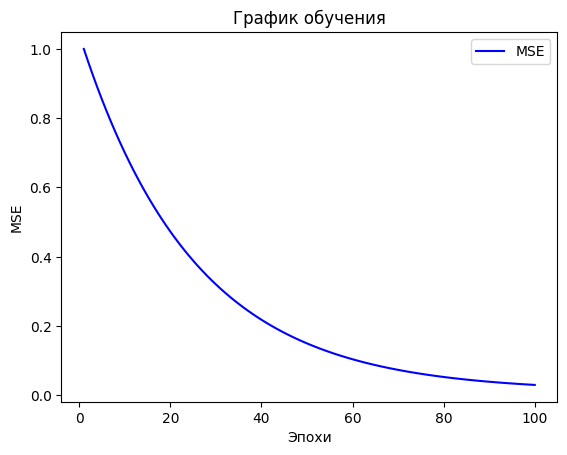

In [176]:
epochs = range(1, len(history) + 1)

# Постройте график обучения.
plt.plot(epochs, history, 'b', label='MSE')
plt.title('График обучения')
plt.xlabel('Эпохи')
plt.ylabel('MSE')
plt.legend()

# Отобразите график.
plt.show()

### Классификатор
#### Контекст
Когда банк получает заявку на получение кредита, на основании профиля заявителя банк должен принять решение о том, одобрять ли кредит или нет. С решением банка связаны два типа рисков."

"Если заявитель подвержен хорошему кредитному риску, т.е. имеет вероятность погасить кредит, то отказ в одобрении кредита этому лицу приводит к потере бизнеса банком
Если заявитель подвержен высокому кредитному риску, т.е. вряд ли сможет погасить кредит, то одобрение кредита этому лицу приводит к финансовым потерям для банка."

Предикторы, которые потенциально могут оказать какое-либо влияние на кредитоспособность:

Баланс счета: Нет счета (1), Нет (Нет баланса) (2), Некоторый баланс (3)

Статус платежа: Некоторые проблемы (1), Оплачено (2), Проблем нет (в этом банке) (3)

Сбережения/Стоимость запасов: Нет, ниже 100 немецких марок, [100, 1000] немецких марок, выше 1000 немецких марок

Стаж работы: Менее 1 года (включая безработных), [1, 4), [4, 7), Выше 7

Пол/Семейное положение: Мужчина разведен/Не женат, Мужчина женат/овдовел, Женщина

Количество кредитов в этом банке: 1, более 1

Гарант: Нет, Да

Одновременные кредиты: Другие банки или универмаги, отсутствуют

Переменная "Иностранный работник" может быть исключена из исследования

Цель кредита: Новый автомобиль, подержанный автомобиль, Связанный с домом, Другое

In [177]:
data = pd.read_csv('german.csv', sep=';')
Y = data["Creditability"]
X = data[['Account_Balance',
          'Payment_Status_of_Previous_Credit',
          'Value_Savings_Stocks',
          'Length_of_current_employment',
          'Sex_Marital_Status',
          'No_of_Credits_at_this_Bank',
          'Guarantors',
          'Purpose']]



In [178]:
print(data.describe())

       Creditability  Account_Balance  Duration_of_Credit_monthly  \
count    1000.000000      1000.000000                 1000.000000   
mean        0.700000         2.577000                   20.903000   
std         0.458487         1.257638                   12.058814   
min         0.000000         1.000000                    4.000000   
25%         0.000000         1.000000                   12.000000   
50%         1.000000         2.000000                   18.000000   
75%         1.000000         4.000000                   24.000000   
max         1.000000         4.000000                   72.000000   

       Payment_Status_of_Previous_Credit      Purpose  Credit_Amount  \
count                         1000.00000  1000.000000     1000.00000   
mean                             2.54500     2.828000     3271.24800   
std                              1.08312     2.744439     2822.75176   
min                              0.00000     0.000000      250.00000   
25%               

In [179]:
mean = X.mean(axis=0)

# Вычислите стандартное отклонение по столбцам.
std = X.std(axis=0)

# Нормализуйте данные по столбцам (стандартное масштабирование).
normalized_X = (X - mean) / std

In [180]:
lc = LinearClassifier(num_features=X.shape[1])
history = lc.fit(normalized_X, Y.to_numpy(), learning_rate=0.01, epochs=20)

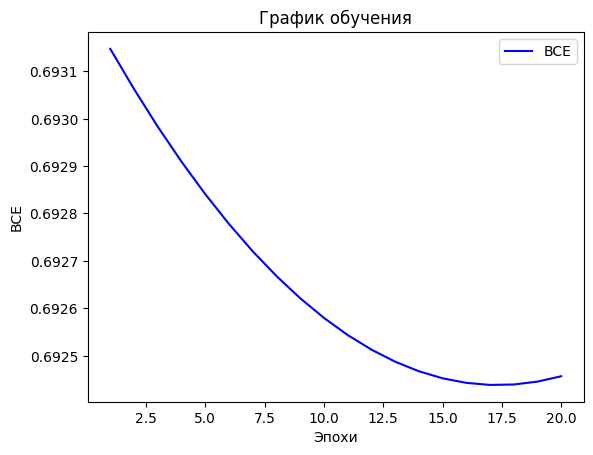

In [181]:
epochs = range(1, len(history) + 1)

# Постройте график обучения.
plt.plot(epochs, history, 'b', label='BCE')
plt.title('График обучения')
plt.xlabel('Эпохи')
plt.ylabel('BCE')
plt.legend()

# Отобразите график.
plt.show()

In [182]:
pred = lc.predict(normalized_X)
print('accuracy: ', (pred == Y).sum() / len(Y))
#метод тыка и самый большй результат который я смог вывести

accuracy:  0.498


Вычислите для этой модели ROC-AUC, precision, recall и f1

In [183]:
import sklearn.metrics
print(sklearn.metrics.roc_auc_score(Y,pred))
print(sklearn.metrics.precision_score(Y,pred, pos_label = 1))
print(sklearn.metrics.recall_score(Y,pred, pos_label = 1))
print(sklearn.metrics.f1_score(Y,pred, pos_label = 1))

0.6223809523809524
0.9159663865546218
0.31142857142857144
0.464818763326226
